In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('train.csv')

# Explore Data - What are the interesting points?
 Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [4]:
df['Survived'].value_counts()    

0    549
1    342
Name: Survived, dtype: int64

**Plotlibs**

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


0    0.616162
1    0.383838
Name: Survived, dtype: float64

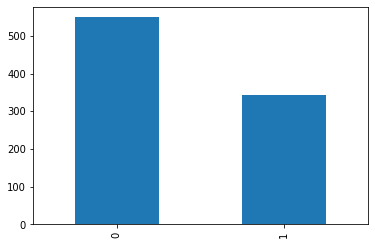

In [6]:
plt.figure()    
df.Survived.value_counts().plot(kind="bar")
df.Survived.value_counts(normalize=True)

## normalize shows class imbalance.


 Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [7]:
((sum((df['Survived'] == 1) & (df['Pclass'] == 1))))/sum(df['Pclass']==1)

0.6296296296296297


## Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

In [14]:
df[['Survived','Pclass','Sex']]


# df1.set_index('Survived', inplace=True)
# df1.groupby('Pclass').count().plot.bar()
# df[df['Survived'== 1].groupby('Pclass','Sex','Survived').count()


,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male
...,...,...,...
886,0,2,male
887,1,1,female
888,0,3,female
889,1,1,male


# Define the goal
##  We want to create a model which can predict, wether a passenger survives or not

What Kind of Model could do this? --> Regressionproblem (0 or 1)

In [27]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()

# Define our Features

In [16]:
X = df[['Pclass', 'Sex', 'Embarked', 'Age']] #input

y = df['Survived'] #output

In [17]:
from sklearn.model_selection import train_test_split   #split data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [42]:
X_train.isna().sum()    # What is the missing Data?

Pclass        0
Sex           0
Embarked      2
Age         132
dtype: int64

Replace the missing Data

In [43]:
MEDIAN_AGE_FROM_TRAINING = X_train['Age'].median()
MODE_EMBARKED_FROM_TRAINING = X_train['Embarked'].mode().values[0]
def feature_engineer(df):
    
    """
       input: df
       
       Write a function which applies a given set of feature engineering
       changes on a dataframe, and return the cleaned / feature-engineered
       version of that data frame.
       
       This is for code reusability!!!
       
       output: df
    """
    
    #1. Fill in missing values for Age FROM THE TRAINING DATA

    df = df.fillna({'Age': MEDIAN_AGE_FROM_TRAINING})
    
    #2. Fill in missing values for Embarked FROM THE TRAINING DATA

    df = df.fillna({'Embarked': MODE_EMBARKED_FROM_TRAINING})
    
    #3. Label encoding / one-hot encoding
    # create binary columns out of original categories
    # logistic regression pairs very nicely with one-hot-encoding
    df_final = pd.get_dummies(df, drop_first=True)
    
    #3. Return result
    
    return df_final

In [44]:
feature_engineer(X_train)

,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
298,1,28.00,1,0,1
884,3,25.00,1,0,1
247,2,24.00,0,0,1
478,3,22.00,1,0,1
305,1,0.92,1,0,1
...,...,...,...,...,...
106,3,21.00,0,0,1
270,1,28.00,1,0,1
860,3,41.00,1,0,1
435,1,14.00,0,0,1


# **3 Steps to modeling **

In [ ]:
## 1 Import the model, from sklearn
## 2 Biild / instatiate the model
## 3 Train or 'fit' our model

In [ ]:
from sklearn.linear_model import LogisticRegression
# Step 1. import the model   /// First think about the problem, classification, regression or unsupervised --> its progress

In [ ]:
#Step 2 instatitate the model (set it equal to a variable)

m = LogisticRegression()   ##Stay open or stay close parenthesis   <--- Hyperparameters in the Parathensis

In [ ]:
# Step 3 Train the MOdel / fit the model on our data

m.fit(X,y)

# So What happened now??

- The model solved the two parameters, 'a' and 'b' such that the resulting sigmoid curve fits the data as best as possible
    - The resulting 'a' and 'b' values, when plugged back into the sigmoid function and run on all the input data, gives a curve with the lowest log-loss (or the highest maximum likelihood). **Perspektive of Staistician and Calculus ** 

In [40]:
m.coef_ # there our a value

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [ ]:
m.intercept_  # b value

Final Equation:


X ----> [y = 1 / (1 +e^(-0.015x - 0.941))] ----> y

In [ ]:
m.score(X,y)
#this model , when applied on its own training data, can accurately classify 66,5% of the passengers

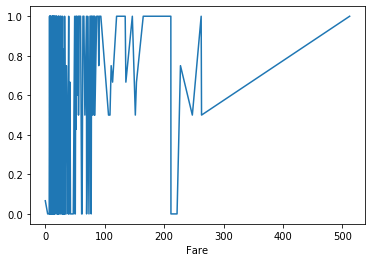

In [47]:
df.groupby('Fare')['Survived'].mean().plot()      ### to eat 78%

In [ ]:
df.corr()   ### Take look at a feature  and compare it with other -- 
###Strong magnitude would be good, remember this is correlation not causeation
#as Rule of thumb

In [ ]:
m.predict(X)   # Predict to Kaggle